# Procesamiento de Imagenes
## Trabajo Practico nº1



In [24]:
from ipywidgets import widgets as wg
from IPython.display  import clear_output, display
from tkinter import Tk, filedialog
import panel as pn
import panel.interact as interact
pn.extension()

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [25]:
def resume_path(path, length = 50):
    index = len(path) - length    
    return f'...{path[index:]}'

def convert_RGB_to_YIQ(rgb_img):
    rgb_to_yiq = np.array([[0.299,      0.587,   0.114],
                         [0.595716, -0.274453, -0.321263],
                         [0.211456, -0.522591, 0.311135]])
    rgb_dtype_float = rgb_img.astype(float)
    rgb_normalize = rgb_dtype_float / 255
    return np.dot(rgb_normalize, rgb_to_yiq.T.copy())
    
def convert_YIQ_to_RGB(yiq_img_normalize):
    yiq_to_rgb = np.array([[1,      0.9563,   0.6210],
                         [1, -0.2721, -0.6474],
                         [1, -1.1070, 1.7046]])
    rgb_normalize = np.dot(yiq_img_normalize, yiq_to_rgb.T.copy())
    rgb_dtype_float = rgb_normalize * 255
    return (rgb_dtype_float.astype(int))

def customize_YIQ_image(yiq_narray, alfa = 1, beta =1):
    yiq_customize = yiq_narray.copy()
    y_component = yiq_customize[:,:,0] * alfa
    i_component = yiq_customize[:,:,1] * beta
    q_component = yiq_customize[:,:,2] * beta
    
    yiq_customize[:,:,0] = y_component
    yiq_customize[:,:,1] = i_component
    yiq_customize[:,:,2] = q_component
    return yiq_customize

def get_custom_rgb_from_yiq(yiq_img, alfa =1, beta=1):
    return convert_YIQ_to_RGB(customize_YIQ_image(yiq_img, alfa, beta))

def custom_rgb_img(rgb_img, alfa=1, beta=1):
    yiq_img = convert_RGB_to_YIQ(rgb_img)
    return get_custom_rgb_from_yiq(yiq_img, alfa, beta)

def normalize_rgb(img_rgb):
    height, width, channels = img_rgb.shape
    norm_img = np.zeros((height, width))
    final_img = cv2.normalize(img_rgb, norm_img, 0, 255, cv2.NORM_L1)
    return final_img

def get_widgets():
    alfa = wg.FloatSlider(value=1,
                    min=0,
                    max=10.0,
                    step=0.01,
                    description='Alfa',
                    disabled=False,
                    continuous_update=False,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.1f',)
    beta = wg.FloatSlider(value=1,
                    min=0,
                    max=10.0,
                    step=0.01,
                    description='Beta',
                    disabled=False,
                    continuous_update=False,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.1f',)

    filtros = wg.Dropdown(options=['Ninguno','Raíz','Cuadrado','Lineal a trozos'],
                                    value='Ninguno',
                                    description='Filtros:',
                                    disabled=False)
    return alfa, beta, filtros



In [26]:
img_path = ''
# General Functions
def select_file_onClick(b):    
    root = Tk()
    root.withdraw()
    root.call('wm','attributes', '.', '-topmost', True)
    b.files = filedialog.askopenfilename(multiple=False)
    lbl_path_img.value = f'{b.files}'
    img_path = b.files
    file = open(b.files, "rb")
    image = file.read()
    img = wg.Image(
        value=image,
        format='jpeg',
        width=300,
        height=400,
    )
    display(img)


lbl_path_img = wg.Label(value='')

button_select_img = wg.Button(description='Select image', 
                        tooltip='Click me',
                        icon='image' )

display(lbl_path_img, button_select_img)


#Events----------------------------------------------------------------------------
button_select_img.on_click(select_file_onClick)

Label(value='')

Button(description='Select image', icon='image', style=ButtonStyle(), tooltip='Click me')

FileNotFoundError: [Errno 2] No such file or directory: ''

# Ejercicio 1.1
Podríamos llamar alpha al coeficiente de luminancia (si es menor que uno, baja la luminancia, y viceversa), y beta al coeficiente de saturación (si es menor que uno baja la saturación, y viceversa). El workflow a implementar consiste en los siguientes pasos:

* 1. Normalizar los valores de RGB del pixel
* 2. RGB -> YIQ (utilizando la segunda matriz)
* 3. Y’ := aY;
* 4. I’ := bI; Q’ := bQ;
* 5. Chequear que Y’ <= 1 (para que no se vaya de rango)
* 6. Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
* 7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
* 8. Convertir R’G’B’ a bytes y graficar el pixel

In [21]:
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


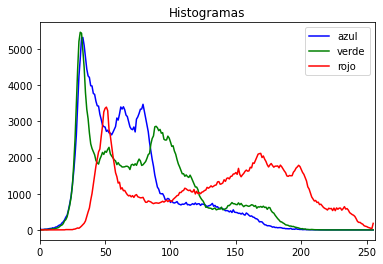

In [7]:
color = ('b','g','r')
for i, c in enumerate(color):
    hist = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.title('Histogramas')
plt.legend(['azul','verde','rojo'])
plt.show()

## Ejercicio 1.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Alfa: 1.5 - Beta: 1')

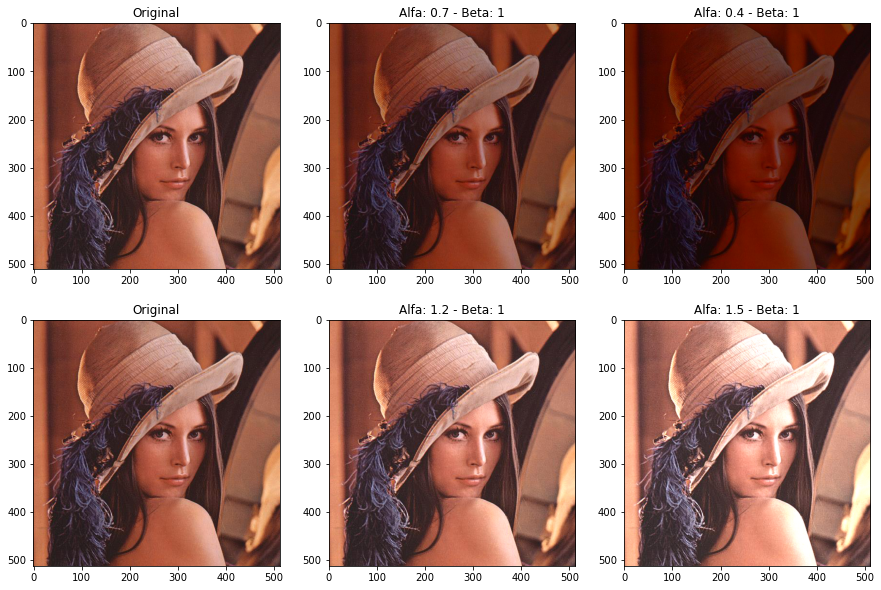

In [8]:
alfa = [1, 0.7, 0.4, 1.2, 1.5]
beta = [1, 1, 1, 1, 1]
yiq_img = convert_RGB_to_YIQ(img_rgb)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

axs[0,0].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[0], beta[0]))
axs[0,0].set_title('Original')

axs[0,1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[1], beta[1]))
axs[0,1].set_title(f'Alfa: {alfa[1]} - Beta: {beta[1]}')

axs[0,2].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[2], beta[2]))
axs[0,2].set_title(f'Alfa: {alfa[2]} - Beta: {beta[2]}')


axs[1,0].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[0], beta[0]))
axs[1,0].set_title(f'Original')

axs[1,1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[3], beta[3]))
axs[1,1].set_title(f'Alfa: {alfa[3]} - Beta: {beta[3]}')

axs[1,2].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[4], beta[4]))
axs[1,2].set_title(f'Alfa: {alfa[4]} - Beta: {beta[4]}')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Alfa: 1 - Beta: 1.5')

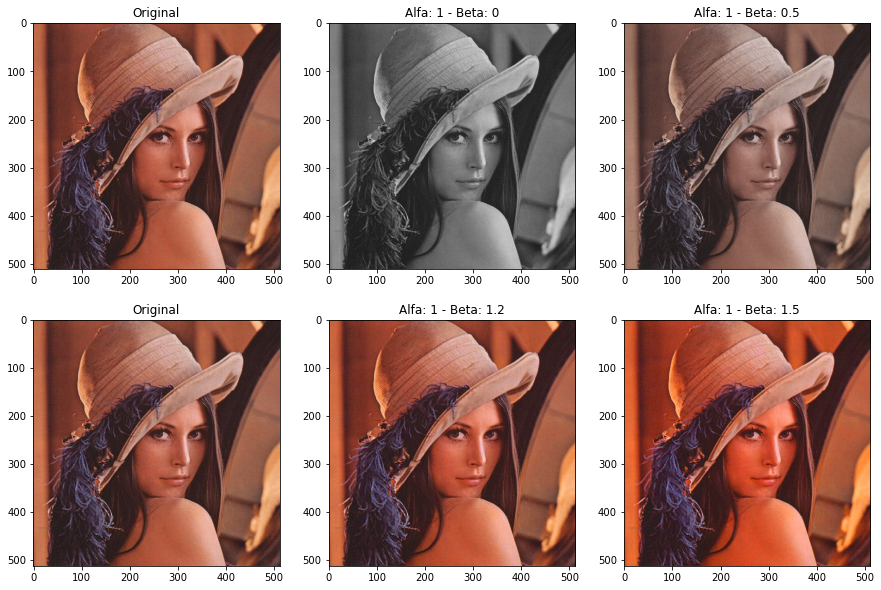

In [9]:
alfa = [1, 1, 1, 1, 1]
beta = [1, 0, 0.5, 1.2, 1.5]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

axs[0,0].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[0], beta[0]))
axs[0,0].set_title('Original')

axs[0,1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[1], beta[1]))
axs[0,1].set_title(f'Alfa: {alfa[1]} - Beta: {beta[1]}')

axs[0,2].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[2], beta[2]))
axs[0,2].set_title(f'Alfa: {alfa[2]} - Beta: {beta[2]}')


axs[1,0].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[0], beta[0]))
axs[1,0].set_title(f'Original')

axs[1,1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[3], beta[3]))
axs[1,1].set_title(f'Alfa: {alfa[3]} - Beta: {beta[3]}')

axs[1,2].imshow(get_custom_rgb_from_yiq(yiq_img, alfa[4], beta[4]))
axs[1,2].set_title(f'Alfa: {alfa[4]} - Beta: {beta[4]}')


In [11]:
# IntSlider
# square number

yiq_img = convert_RGB_to_YIQ(img_rgb)

slider = wg.FloatSlider(value=1,
                min=0,
                max=10.0,
                step=0.01,
                description='Alfa:',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',)

def square1(number):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axs[0].imshow(get_custom_rgb_from_yiq(yiq_img))
    axs[0].set_title('Original')
    axs[1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa=number))
    axs[1].set_title(f'Alfa: {number}')
    #plt.imshow(get_custom_rgb_from_yiq(yiq_img, number))

wg.interact(square1, number=slider);

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Alfa:', max=10.0, readout_f…

In [12]:
# IntSlider
# square number

yiq_img = convert_RGB_to_YIQ(img_rgb)

alfa, beta, filtros = get_widgets()

def square1(alfa, beta, filtros):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axs[0].imshow(get_custom_rgb_from_yiq(yiq_img))
    axs[0].set_title('Original')
    axs[1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa=alfa, beta=beta))
    axs[1].set_title(f'Alfa: {alfa} - Beta: {beta}')
    print(filtros)
    #plt.imshow(get_custom_rgb_from_yiq(yiq_img, number))

out = wg.interactive_output(square1, {'alfa': alfa, 'beta': beta, 'filtros': filtros});
wg.HBox([wg.VBox([alfa, beta, filtros, out])])

## Ejercicio 1.2

In [ ]:
Desarrollar un aplicativo que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe
poder elegir filtro raíz, cuadrado, o lineal a trozos. Los controles para elegir los filtros los organizan como les resulte más
cómodo

In [ ]:
button = wg.Button(description="Click Me!")
output = wg.Output()

display(button, output)

@output.capture()
def on_button_clicked(b):
    print(type(b))
    print("Button clicked.")
    b.icon="warning"

button.on_click(on_button_clicked)

In [ ]:
# IntSlider
# square number

yiq_img = convert_RGB_to_YIQ(img_rgb)

slider = wg.FloatSlider(value=1,
                min=0,
                max=10.0,
                step=0.01,
                description='Test:',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',)

def square1(number):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axs[0].imshow(get_custom_rgb_from_yiq(yiq_img))
    axs[0].set_title('Original')
    axs[1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa=number))
    axs[1].set_title(f'Alfa: {number}')
    #plt.imshow(get_custom_rgb_from_yiq(yiq_img, number))

wg.interact(square1, number=slider);

In [ ]:
text_box = pn.widgets.TextInput(name='Enter Name', value='')
text = pn.widgets.StaticText()
text_url = pn.widgets.StaticText()

def hello(event):
    text.value = f'Hello {text_box.value}. Have a great day'
    display(text)
    
# General Functions
def select_file_onClick(b):
    #clear_output()
    root = Tk()
    root.withdraw()
    root.call('wm','attributes', '.', '-topmost', True)
    b.files = filedialog.askopenfilename(multiple=False)
    text.value =b.files
    display(text)
    

button = pn.widgets.Button(name='click', button_type = 'primary')
button_select_img = pn.widgets.Button(name='Select image', button_type = 'primary' )
button.on_click(hello)
button_select_img.on_click(select_file_onClick)

pn.Column(text_box, button, button_select_img, text)

In [23]:

# make chart interactive
# change number of bins for histogram

import matplotlib.pyplot as plt
%matplotlib inline
from vega_datasets import data

# data
cars = data.cars()
hist_data = cars['Miles_per_Gallon'].dropna()

arrow = ipywidgets.BoundedIntText(value=50,
                                  min=25,
                                  max=100,
                                  step=1,
                                  description='Bins:',
                                  disabled=False)

def create_histogram(bins):
    plt.hist(hist_data, bins=bins)
    
ipywidgets.interact(create_histogram, bins=arrow);

ModuleNotFoundError: No module named 'vega_datasets'

In [22]:
# IntSlider
# square number

yiq_img = convert_RGB_to_YIQ(img_rgb)

slider = wg.FloatSlider(value=1,
                min=0,
                max=10.0,
                step=0.01,
                description='Test:',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='.1f',)

def square1(number):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axs[0].imshow(get_custom_rgb_from_yiq(yiq_img))
    axs[0].set_title('Original')
    axs[1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa=number))
    axs[1].set_title(f'Alfa: {number}')
    #plt.imshow(get_custom_rgb_from_yiq(yiq_img, number))

wg.interact(square1, number=slider);

NameError: name 'img_rgb' is not defined

In [12]:
# IntSlider
# square number

yiq_img = convert_RGB_to_YIQ(img_rgb)

alfa, beta, filtros = get_widgets()

def square1(alfa, beta, filtros):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axs[0].imshow(get_custom_rgb_from_yiq(yiq_img))
    axs[0].set_title('Original')
    axs[1].imshow(get_custom_rgb_from_yiq(yiq_img, alfa=alfa, beta=beta))
    axs[1].set_title(f'Alfa: {alfa} - Beta: {beta}')
    print(filtros)
    #plt.imshow(get_custom_rgb_from_yiq(yiq_img, number))

out = wg.interactive_output(square1, {'alfa': alfa, 'beta': beta, 'filtros': filtros});
wg.HBox([wg.VBox([alfa, beta, filtros, out])])

In [ ]:
# General Functions
def select_file_onClick(b):    
    root = Tk()
    root.withdraw()
    root.call('wm','attributes', '.', '-topmost', True)
    b.files = filedialog.askopenfilename(multiple=False)
    lbl_path_img.value = f'{b.files}'
    img_path = b.files
    file = open(b.files, "rb")
    image = file.read()
    img = wg.Image(
        value=image,
        format='jpeg',
        width=300,
        height=400,
    )
    display(img)


lbl_path_img = wg.Label(value='')

button_select_img = wg.Button(description='Select image', 
                        tooltip='Click me',
                        icon='image' )

#display(lbl_path_img, button_select_img)


#Events----------------------------------------------------------------------------
#button_select_img.on_click(select_file_onClick)

wg.interact(select_file_onClick, b=button_select_img);